In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import librosa 
import math 


In [2]:
# path to json 
DATA_PATH = "data_10_spotify.json"

def load_data(DATA_PATH):

    with open(DATA_PATH, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    x = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded")

    return x, y


In [3]:
# load data 
X, y = load_data(DATA_PATH)

X.shape

Data succesfully loaded


(4500, 130, 13)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3)

# Simple ANN

## Activation function:
### relu fucntion:
"ReLU" stands for "Rectified Linear Unit" and is a popular activation function used in deep learning models, including those built with Keras.
The ReLU activation function is preferred over other activation functions such as sigmoid and tanh because it is computationally efficient and 
allows for faster convergence during training. It is also less prone to the vanishing gradient problem, which can occur when using sigmoid or 
tanh activation functions in deep neural networks.

### softmax function
The softmax activation function is a commonly used activation function in neural networks, particularly in the output layer of classification 
models. It converts a vector of arbitrary real values into a probability distribution, meaning that the sum of the outputs is equal to 1.0.

In [5]:
 # building network topology 
model = keras.Sequential([

    #input layer
    keras.layers.Flatten(input_shape = (X.shape[1], X.shape[2])),

    #1st dense layer
    keras.layers.Dense(512, activation="relu"),

    #2nd dense layer
    keras.layers.Dense(256, activation="relu"),

    #3nd dense layer
    keras.layers.Dense(64, activation="relu"),

    #4nd dense layer
    keras.layers.Dense(16, activation="softmax")

])

# Optimizer:
Adam (Adaptive Moment Estimation) is a popular optimization algorithm used in deep learning models, including those built with Keras. The Adam optimizer combines the benefits of two other optimization algorithms: AdaGrad and RMSProp.
The Adam optimizer adapts the learning rate for each parameter in the network based on the gradient of the loss function and a running estimate of the second moment of the gradients. This allows it to converge quickly and efficiently to a solution, especially for large and complex models.

Adam also includes bias correction, which makes it more stable during early training stages. Additionally, it is less sensitive to hyperparameter choices than other optimization algorithms such as stochastic gradient descent (SGD).

Overall, Adam is a good choice of optimizer for most deep learning applications and is often the default choice in Keras.

In [6]:
# compose model 
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer = optimiser,
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy'] 
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
Total params: 1,014,608
Trainable params: 1,014,608
Non-trainable params: 0
_________________________________________________________________


In [8]:
# train model

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
99/99 [==============================] - 3s 16ms/step - loss: 8.1081 - accuracy: 0.3613 - val_loss: 4.8966 - val_accuracy: 0.4311
Epoch 2/50
99/99 [==============================] - 1s 14ms/step - loss: 3.0184 - accuracy: 0.5146 - val_loss: 3.4980 - val_accuracy: 0.4785
Epoch 3/50
99/99 [==============================] - 1s 14ms/step - loss: 1.8436 - accuracy: 0.5975 - val_loss: 2.9894 - val_accuracy: 0.4941
Epoch 4/50
99/99 [==============================] - 1s 14ms/step - loss: 1.2324 - accuracy: 0.6667 - val_loss: 2.6865 - val_accuracy: 0.5281
Epoch 5/50
99/99 [==============================] - 1s 14ms/step - loss: 0.7712 - accuracy: 0.7663 - val_loss: 2.6779 - val_accuracy: 0.5437
Epoch 6/50
99/99 [==============================] - 1s 14ms/step - loss: 0.5699 - accuracy: 0.8108 - val_loss: 2.6358 - val_accuracy: 0.5533
Epoch 7/50
99/99 [==============================] - 1s 14ms/step - loss: 0.4317 - accuracy: 0.8508 - val_loss: 2.5655 - val_accuracy: 0.5607
Epoch 8/50
99

In [ ]:
import matplotlib.pyplot as plt


def plot_history(h):

    fig, axs = plt.subplots(2)

    #create accuracy subplot
    axs[0].plot(h.history["accuracy"], label = "train accuarcy")
    axs[0].plot(h.history["val_accuracy"], label = "test accuarcy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy level")

    #create error subplot 
    axs[1].plot(h.history["loss"], label = "train error")
    axs[1].plot(h.history["val_loss"], label = "test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()



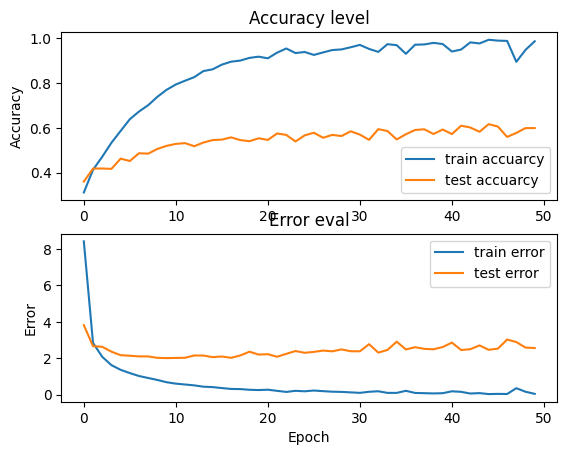

In [ ]:
plot_history(history)

# Managing Overfitting:

## Dropout layer:
The Dropout layer is a regularization technique used in neural networks to prevent overfitting. During training, it randomly drops out a specified fraction of input neurons, which reduces their co-dependence and prevents overfitting. This improves the generalization of the model and leads to better performance on unseen data. During testing or prediction, all neurons are used to make predictions.

In [ ]:
#build the network topology
model_regularized = keras.Sequential([

    #input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    #1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    #2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    #3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    #output layer
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# compose model 
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(
    optimizer = optimiser,
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy'] 
)

In [ ]:
# train model

history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/150
219/219 [==============================] - 3s 15ms/step - loss: 2.9774 - accuracy: 0.3131 - val_loss: 2.8597 - val_accuracy: 0.3578
Epoch 2/150
219/219 [==============================] - 3s 15ms/step - loss: 2.9369 - accuracy: 0.3233 - val_loss: 2.8027 - val_accuracy: 0.3768
Epoch 3/150
219/219 [==============================] - 3s 15ms/step - loss: 2.9095 - accuracy: 0.3247 - val_loss: 2.8112 - val_accuracy: 0.3688
Epoch 4/150
219/219 [==============================] - 3s 15ms/step - loss: 2.8718 - accuracy: 0.3389 - val_loss: 2.7633 - val_accuracy: 0.3875
Epoch 5/150
219/219 [==============================] - 3s 16ms/step - loss: 2.8398 - accuracy: 0.3469 - val_loss: 2.7357 - val_accuracy: 0.3751
Epoch 6/150
219/219 [==============================] - 3s 16ms/step - loss: 2.8166 - accuracy: 0.3471 - val_loss: 2.7280 - val_accuracy: 0.4045
Epoch 7/150
219/219 [==============================] - 3s 15ms/step - loss: 2.8037 - accuracy: 0.3523 - val_loss: 2.7014 - val_accuracy:

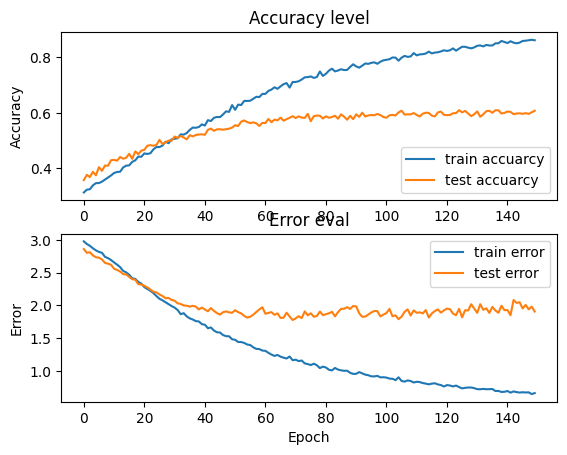

In [ ]:
plot_history(history)

## Convolutional Neural Network

In [ ]:
  # create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
print(input_shape)

(130, 13, 1)


In [ ]:

# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))